In [1]:
import numpy as np
import matplotlib.pyplot as plt
import sys

sys.path.append(r'C:\Users\kpourg01\Desktop\Work\Code\tool')
import mytool
tool = mytool.Wiz()

In [2]:
dataset_information={
    'day':'24Oct',
    'month':'10',
    'drone':'2',
    'time_period':'0900_0930',
    'road':'Panepistimiou',
    'intersection':'Panepistimiou-Omirou'
    }

nickname = f'Drone{dataset_information.get('drone')}_{dataset_information.get('day')}_{dataset_information.get('time_period')}'
file_path= fr'C:\Users\kpourg01\Desktop\Work\Code\pNEUMA\datasets\{dataset_information.get('road')}/2018{dataset_information.get('month')}{dataset_information.get('day')[:2]}_d{dataset_information.get('drone')}_{dataset_information.get('time_period')}.csv'

In [3]:
#sampling period must be integer multiple of 0.04
sampling_period_dataloading=0.2
time_decimals=1
#===========================================================================================
import DatasetExample.DataExamplePneuma as DEP
Raw_VD = DEP.getInfo_PNEUMA(file_path=file_path, sampling_period=sampling_period_dataloading, time_decimals=time_decimals, position_smoothing=2)

In [4]:
sampling_period_flowcount=1
sampling_frequency = 1/sampling_period_flowcount
#----------------------------------------------------
time_axis = np.round(np.arange(min([min(set) for set in Raw_VD.get('time')]),max([max(set) for set in Raw_VD.get('time')])+sampling_period_flowcount,sampling_period_flowcount),decimals=time_decimals).tolist()
#----------------------------------------------------
WGS=True
#----------------------------------------------------
ll_lat,ll_lon = 37.97811671602297, 23.733975874806358
lr_lat,lr_lon = 37.97876143771719, 23.735210640421347
ur_lat,ur_lon = 37.97938790250702, 23.734674127747873
ul_lat,ul_lon = 37.97874587304865, 23.73345028699124
#----------------------------------------------------
clat,clon = 37.97866950849114, 23.734362398006162
#----------------------------------------------------
bbox = [(ll_lat,ll_lon), 
        (lr_lat,lr_lon),
        (ur_lat,ur_lon),
        (ul_lat,ul_lon)]
#----------------------------------------------------
SpatioTemporalInfo  =  {
                        'WGS':WGS,
                        'bbox':bbox,
                        'x center': clon,
                        'y center': clat,
                        'time axis': time_axis
                        }

In [5]:
cursed_ids={}
#================================================================
cursed_ids['24Oct_0900_0930']=[208,1442,75,2450,140,1151,1469,628,2941,154,917]
cursed_ids['24Oct_0930_1000']=[257,2379,1482,2446,2716,270]
cursed_ids['24Oct_1000_1030']=[47,1015,1599,2415,1306,1018,1118,1948,1810,1286,105]
cursed_ids['24Oct_1030_1100']= []
#================================================================
cursed_ids['29Oct_0800_0830']=[]
cursed_ids['29Oct_0830_0900']=[]
cursed_ids['29Oct_0900_0930']=[184,570,2014,2497,158]
cursed_ids['29Oct_0930_1000']=[]
cursed_ids['29Oct_1000_1030']=[]
#================================================================
cursed_ids['30Oct_0800_0830']=[145,1544,157,310,183,154,305,461,312,174,453] 
cursed_ids['30Oct_0830_0900']=[]
cursed_ids['30Oct_0900_0930']=[]
#================================================================
cursed_ids['01Nov_0800_0830']=[]
cursed_ids['01Nov_0830_0900']=[1130]
cursed_ids['01Nov_0900_0930']=[]
cursed_ids['01Nov_0930_1000']=[123,1498]
cursed_ids['01Nov_1000_1030']=[]
#================================================================

In [6]:
#-----------------------------------------------------------------------
DataLoader = tool.DataLoader(Raw_VD=Raw_VD, WGS=WGS, bbox=bbox)
Filtered_VD = DataLoader.get_Filtered_VD(cursed_ids=cursed_ids[f'{dataset_information.get('day')}_{dataset_information.get('time_period')}'])
#-----------------------------------------------------------------------
Analysis = tool.Analysis(Filtered_VD,SpatioTemporalInfo)
Visualization = tool.Visualization(Filtered_VD, SpatioTemporalInfo)

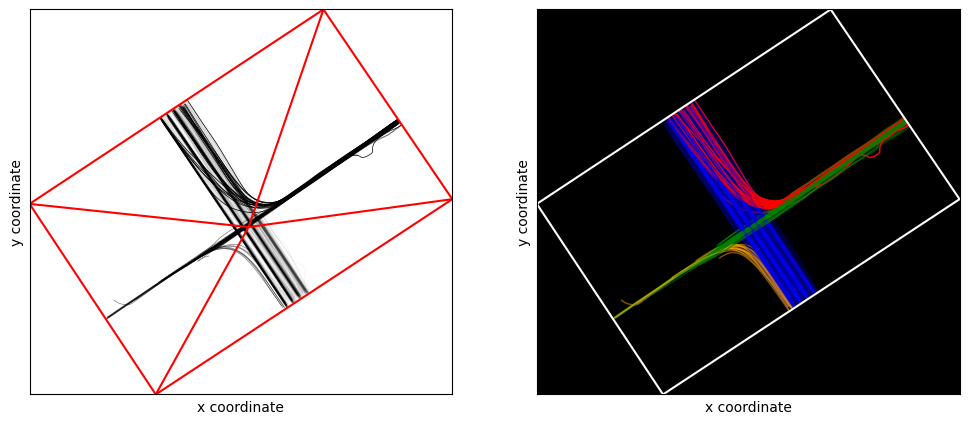

In [8]:
OD_pairs = Analysis.get_ODPairs()
valid_OD_pairs = [(1,3),(1,2),(4,3),(4,2)]
Visualization.Trajectories_OD(valid_OD_pairs)

In [9]:
#----------------------------------------------------------------------
VD_13_12 = Analysis.get_OD_VD(desirable_pairs=[(1,3),(1,2)])
Analysis_13_12 = tool.Analysis(VD_13_12,SpatioTemporalInfo)
Visualization_13_12 = tool.Visualization(VD_13_12,SpatioTemporalInfo)
#----------------------------------------------------------------------
VD_43_42 = Analysis.get_OD_VD(desirable_pairs=[(4,3),(4,2)])
Analysis_43_42 = tool.Analysis(VD_43_42,SpatioTemporalInfo)
Visualization_43_42 = tool.Visualization(VD_43_42,SpatioTemporalInfo)

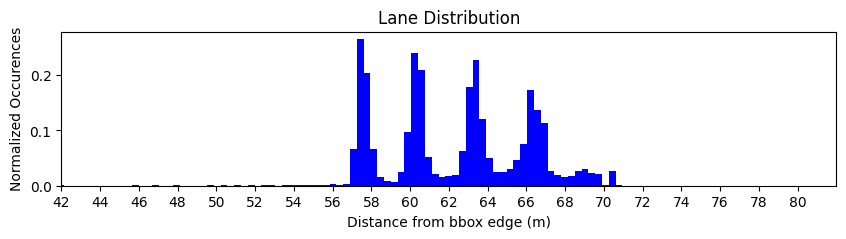

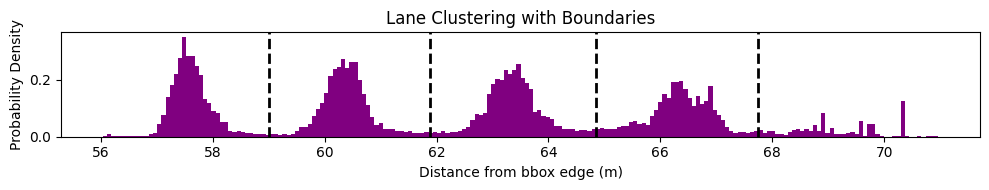

In [10]:
lane_info_13_12 = Analysis_13_12.get_LaneInfo(flow_direction='up',color='purple')

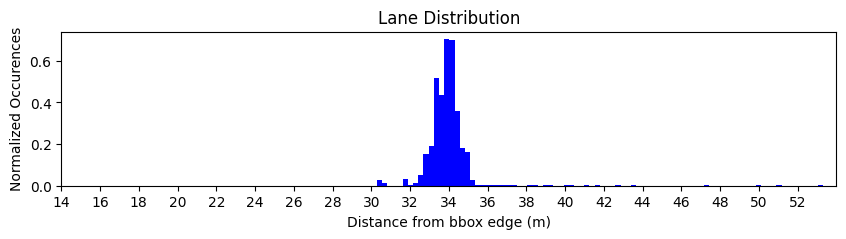

In [11]:
lane_info_43_42 = Analysis_43_42.get_LaneInfo(flow_direction='left',color='orange')

In [12]:
sorted_id_13_12 =Analysis_13_12.get_SortedId()
gaps_13_12 = Analysis_13_12.get_Gaps()
#-=============================================
sorted_id_43_42 = Analysis_43_42.get_SortedId()
gaps_43_42 = Analysis_43_42.get_Gaps()

In [14]:
sorted_id_13_12[45]

{'time stamp': 45.0,
 'lane 0': [284, 286, 236, 281, 278, 255],
 'lane 1': [210, 276, 253, 239],
 'lane 2': [193, 290, 279, 260, 240],
 'lane 3': [0, 217],
 'lane 4': None}

In [15]:
gaps_13_12[45]

{'time stamp': 45.0,
 'lane 0': [18.0, 5.3, 5.9, 2.4, 3.6, -1.0],
 'lane 1': [31.1, 17.7, 10.5, -1.0],
 'lane 2': [18.8, 21.0, 5.2, 11.8, -1.0],
 'lane 3': [36.6, -1.0],
 'lane 4': None}

In [17]:
detector_positions_13_12 = [
                            (37.978598063851116, 23.73433701749522),
                            (37.97861444910225, 23.73438060338954),
                            (37.978632948574926, 23.734412119343897),
                            (37.978652505155274, 23.734447658611572),
                            (37.978666776170066, 23.734481856774803)
                            ]
#---------------------------
flow_info_13_12 =Analysis_13_12.get_FlowInfo(detector_positions_13_12)
flow_13_12,normalized_flow_13_12 = Analysis_13_12.get_NormalizedFlow(threshold=10)
#============================
detector_positions_43_42 = [(37.97872544586954, 23.73444095309425)]
#----------------------------
flow_info_43_42 = Analysis_43_42.get_FlowInfo(detector_positions_43_42)
flow_43_42,normalized_flow_43_42 = Analysis_43_42.get_NormalizedFlow(threshold=15)

In [18]:
print(f'flow counts main: {sum(flow_13_12)}, max vehicles: {len(VD_13_12.get('id'))}')
print(f'\nflow counts secondary: {sum(flow_43_42)}, max vehicles: {len(VD_43_42.get('id'))}')

flow counts main: 1004, max vehicles: 1010

flow counts secondary: 79, max vehicles: 79


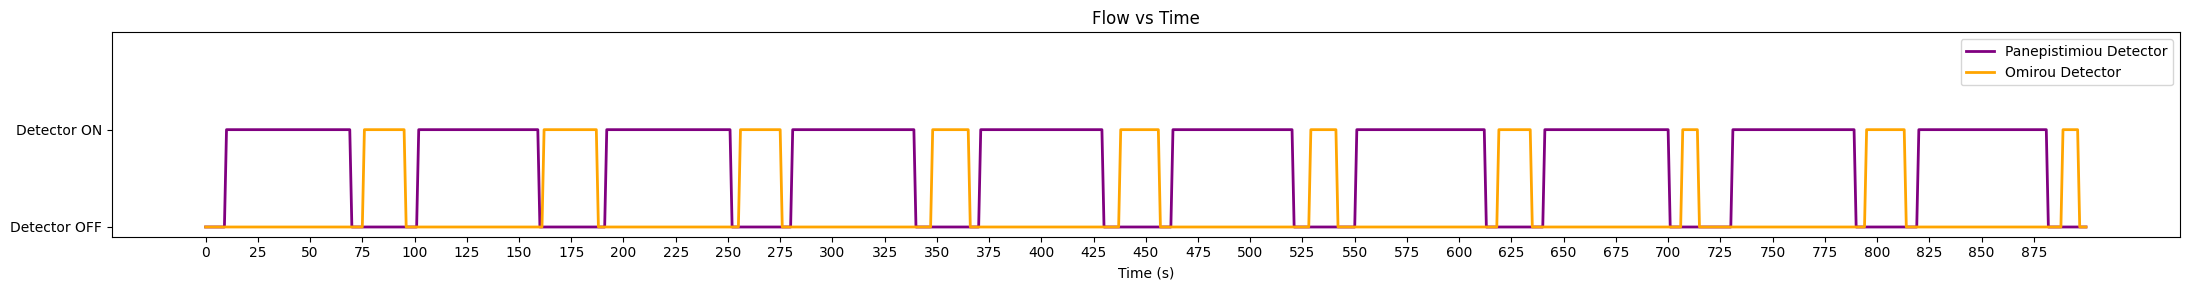

In [19]:
plt.figure(figsize=(22,3))
plt.title('Flow vs Time')

plt.plot(time_axis,normalized_flow_13_12,color='purple',alpha=1, label=f'{dataset_information.get('road')} Detector',linewidth=2)
#plt.plot(time_axis,flow_13_12,color='purple',label='raw flow',alpha=0.4)
#---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
plt.plot(time_axis,normalized_flow_43_42,color='orange',alpha=1,label=f'{dataset_information.get('intersection')[dataset_information.get('intersection').index('-')+1:]} Detector',linewidth=2)
#plt.plot(time_axis,flow_43_42,color='orange',label='raw flow',alpha=1)

plt.xlabel('Time (s)')
plt.yticks([0,1],['Detector OFF','Detector ON'])
plt.xticks(np.arange(0,time_axis[-1],25))
plt.ylim(-0.1,2)


activate_zoom = False
#===================================
if activate_zoom:
    lowlim,highlim=275,300
    plt.xlim(lowlim,highlim)
    plt.xticks(np.arange(lowlim,highlim+sampling_period_flowcount,sampling_period_flowcount))
    Analysis_43_42.get_CursedId(lowlim,highlim)
#===================================

plt.legend()
plt.tight_layout()
plt.show(close=True)

In [20]:
tlp_13_12 = Analysis_13_12.get_TrafficLightPhases()
tlp_43_42 = Analysis_43_42.get_TrafficLightPhases()
#==================================================
cycles = Analysis.get_TrafficLightCycles(tlp_13_12,tlp_43_42)

In [21]:
tlp_13_12[0]

{'Green': 10.0,
 'Duration ON': 60.0,
 'Red': 70.0,
 'Duration OFF': 32.0,
 'Phase Duration': 92.0}

In [22]:
tlp_43_42[0]

{'Green': 76.0,
 'Duration ON': 20.0,
 'Red': 96.0,
 'Duration OFF': 66.0,
 'Phase Duration': 86.0}

In [23]:
cycles[0]

{'Start': 10.0, 'Break': 70.0, 'Continue': 76.0, 'Stop': 96.0, 'End': 102.0}

In [24]:
queue_info_13_12 = Analysis_13_12.get_QueueInfo(speed_threshold=30, gap_threshold=10)
queue_info_43_42 = Analysis_43_42.get_QueueInfo(speed_threshold=30, gap_threshold=10)

In [27]:
queue_info_43_42[0]

[{'Lane': 0,
  'Queued Vehicles': 6,
  'Queue Length': 47.0,
  'Dissipation Duration': 14.0}]